In [43]:
import pandas as pd
data = pd.read_csv('salessimplified.csv')
import matplotlib.pyplot as plt
%matplotlib inline

data.head

<bound method NDFrame.head of         Unnamed: 0     ID   Prod  Cl_Quant   Cl_Val  Cl_Insp
0                1     v1     p1     182.0   1665.0        2
1                2     v2     p1    3072.0   8780.0        2
2                3     v3     p1   20393.0  76990.0        2
3                4     v4     p1     112.0   1100.0        2
4                5     v3     p1    6164.0  20260.0        2
...            ...    ...    ...       ...      ...      ...
401141      411814  v5918  p4126     113.0   9330.0        2
401142      411815  v2540  p4126     118.0   3355.0        2
401143      411816  v5896  p4127     143.0   1835.0        2
401144      411817  v1796  p4127     102.0   1445.0        2
401145      411818  v2540  p4127     106.0   1275.0        2

[401146 rows x 6 columns]>

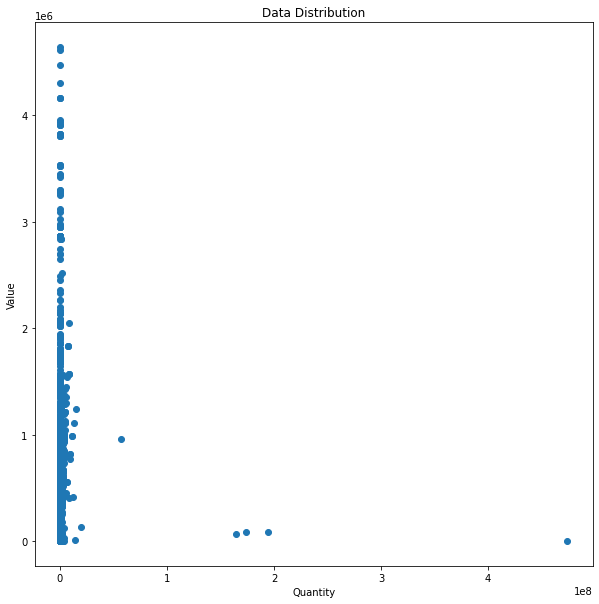

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(data["Cl_Quant"],data["Cl_Val"])
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.title('Data Distribution')
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler

#standardize value and quantity columns
sc = StandardScaler()
amount = data['Cl_Quant'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
value = data['Cl_Val'].values
data['Value'] = sc.fit_transform(value.reshape(-1, 1))
data = data.drop('Cl_Quant', 1)
data = data.drop('Cl_Val', 1)

data.head

<bound method NDFrame.head of         Unnamed: 0     ID   Prod  Cl_Insp    Amount     Value
0                1     v1     p1        2 -0.009154 -0.186067
1                2     v2     p1        2 -0.005951 -0.083854
2                3     v3     p1        2  0.013244  0.896038
3                4     v4     p1        2 -0.009231 -0.194184
4                5     v3     p1        2 -0.002524  0.081065
...            ...    ...    ...      ...       ...       ...
401141      411814  v5918  p4126        2 -0.009230 -0.075953
401142      411815  v2540  p4126        2 -0.009225 -0.161789
401143      411816  v5896  p4127        2 -0.009197 -0.183625
401144      411817  v1796  p4127        2 -0.009242 -0.189228
401145      411818  v2540  p4127        2 -0.009238 -0.191670

[401146 rows x 6 columns]>

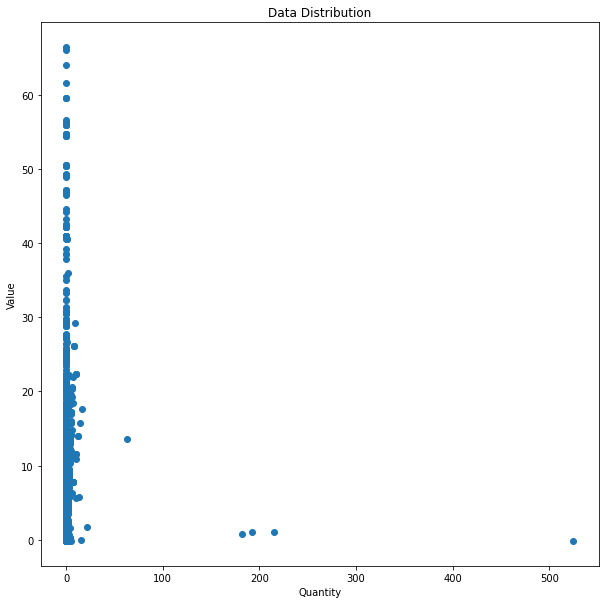

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(data["Amount"],data["Value"])
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.title('Data Distribution')
plt.show()

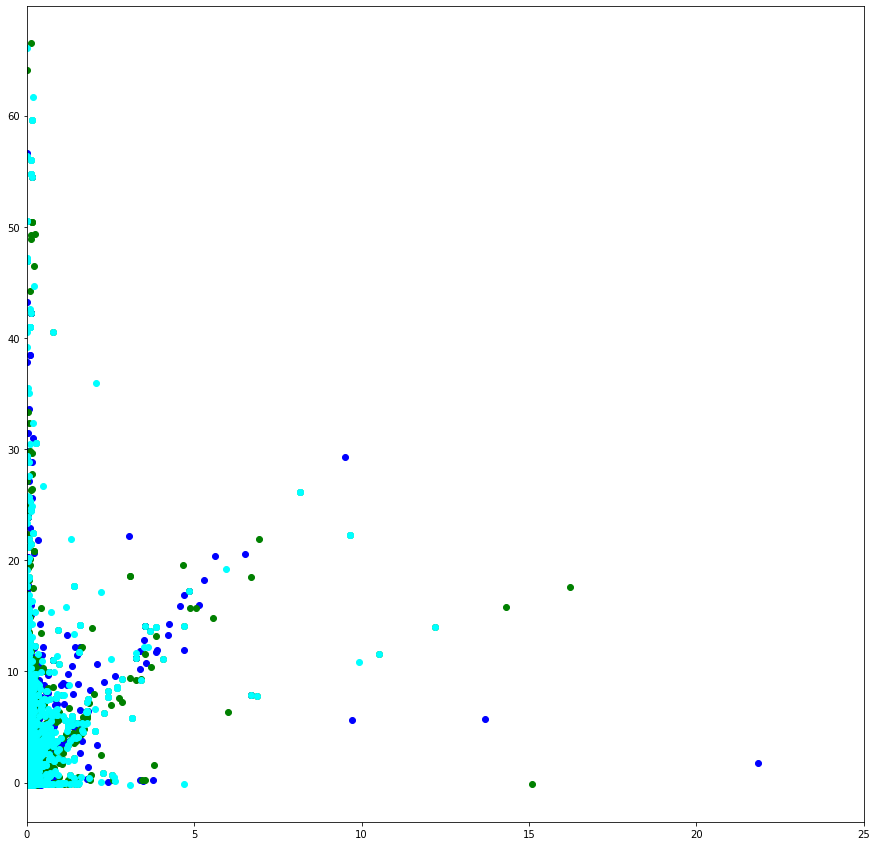

In [47]:
#training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
new_data = data.drop(['ID', 'Prod', 'Cl_Insp'], axis = 1)
kmeans.fit(new_data)

#predictions from kmeans
pred = kmeans.predict(new_data)
frame = pd.DataFrame(new_data)
frame['cluster'] = pred
#frame.columns = ['Amount', 'Value', 'cluster']

#plotting results
plt.figure(figsize=(15,15))
color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Amount"],data["Value"],c=color[k])
plt.xlim([0, 25])
plt.show()

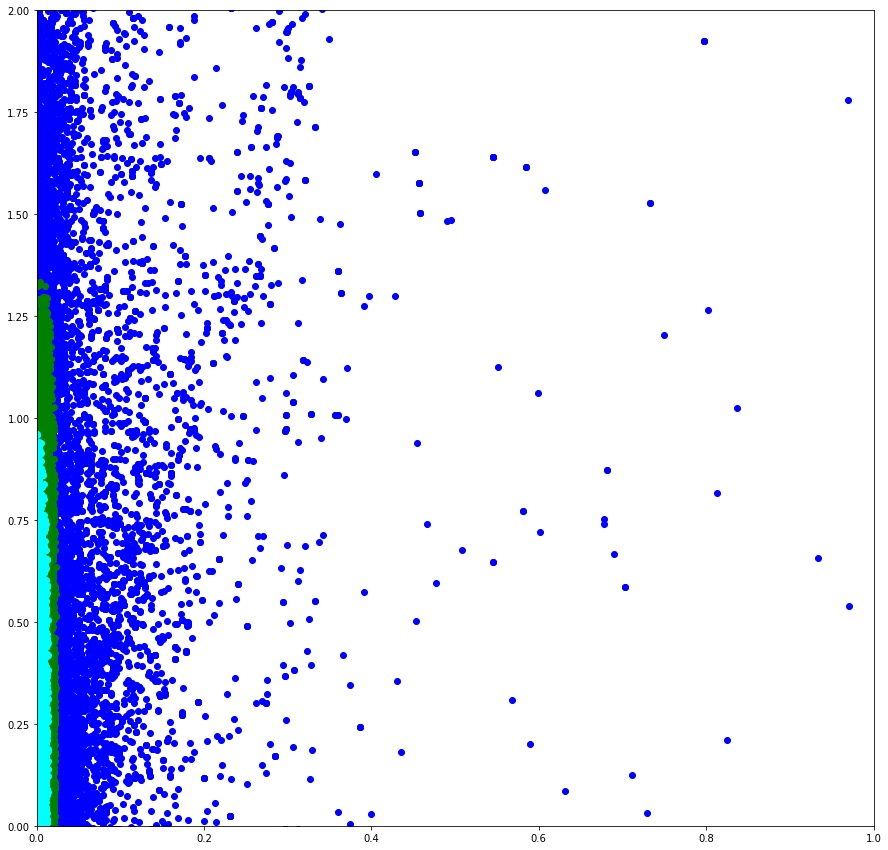

In [50]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(new_data)

#predictions from gmm
labels = gmm.predict(new_data)
frame = pd.DataFrame(new_data)
frame['cluster'] = labels
#frame.columns = ['Amount', 'Value', 'cluster']

plt.figure(figsize=(15,15))
color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Amount"],data["Value"],c=color[k])
plt.xlim([0,1])
plt.ylim([0,2])
plt.show()